In [1]:
import random
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
palette = sns.color_palette("colorblind")

from utils import compute_compute, color_rule, model2compute
from utils import load_benchmark_results, load_steps
from utils import process_pre_post_adjustment

from plot_utils import plot_bench, plot_regressor, emergence_plots
from regress_utils import get_features, regress_seg

In [2]:
dirs = {
    'base': 'evaluations/base/',
    'mmluaux': 'evaluations/e3/mmluaux/',
    'gsm8kaux': 'evaluations/e3/gsm8kaux/',
}

all_results = {name: load_benchmark_results(dir_) for name, dir_ in dirs.items()}

100%|██████████| 65/65 [00:00<00:00, 8451.54it/s]


### First figure

In [3]:
process_kwargs = {'verbose': False, 'use_max': True}
mmlu_pre, mmlu_post = process_pre_post_adjustment(
    all_results['base']['mmlu-acc'], 
    all_results['mmluaux']['mmlu-acc'],
    **process_kwargs,
)

gsm8k_pre, gsm8k_post = process_pre_post_adjustment(
    all_results['base']['gsm8k'],
    all_results['gsm8kaux']['gsm8k'],
    **process_kwargs,
)

### Main plot

In [4]:
def first_plot(rule=None):
    fig, axs = plt.subplots(2, 2, figsize=(8.6, 6), dpi=150, sharex=False, sharey=False)
    plot_regressor(*get_features(mmlu_pre, rule=rule), 0.25, ax=axs[0, 0])
    plot_regressor(*get_features(gsm8k_pre, rule=rule), 0., ax=axs[0, 1])
    plot_regressor(*get_features(mmlu_post, rule=rule), 0.25, ax=axs[1, 0])
    plot_regressor(*get_features(gsm8k_post, rule=rule), 0., ax=axs[1, 1])

    mmlu_ylim = (0.23, 0.75)
    mmlu_yticks = [0.3, 0.4, 0.5, 0.6, 0.7]
    gsm8k_ylim = (-0.03, 0.83)
    gsm8k_yticks = [0.0, 0.2, 0.4, 0.6, 0.8]
    for i in range(2):
        axs[i, 0].set_ylim(*mmlu_ylim)
        axs[i, 0].set_yticks(mmlu_yticks)
        axs[i, 1].set_ylim(*gsm8k_ylim)
        axs[i, 1].set_yticks(gsm8k_yticks)
        axs[i, 0].set_title('MMLU', fontsize=13)
        axs[i, 1].set_title('GSM8K', fontsize=13)

    for i in range(2):
        for j in range(2):
            axs[i, j].set_ylabel('Accuracy', fontsize=13)
            axs[i, j].set_xlabel('Pretraining compute (FLOPs)', fontsize=13)
            axs[i, j].tick_params(axis='both', which='both', length=0, labelsize=12)

    return fig, axs

/Users/rdo/Desktop/training-on-the-test-task/notebooks/plot_utils.py:62: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(c_, a_, c=color_, alpha=0.6, s=60 if main else 40, zorder=zorder_)
/Users/rdo/Desktop/training-on-the-test-task/notebooks/plot_utils.py:62: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(c_, a_, c=color_, alpha=0.6, s=60 if main else 40, zorder=zorder_)
/Users/rdo/Desktop/training-on-the

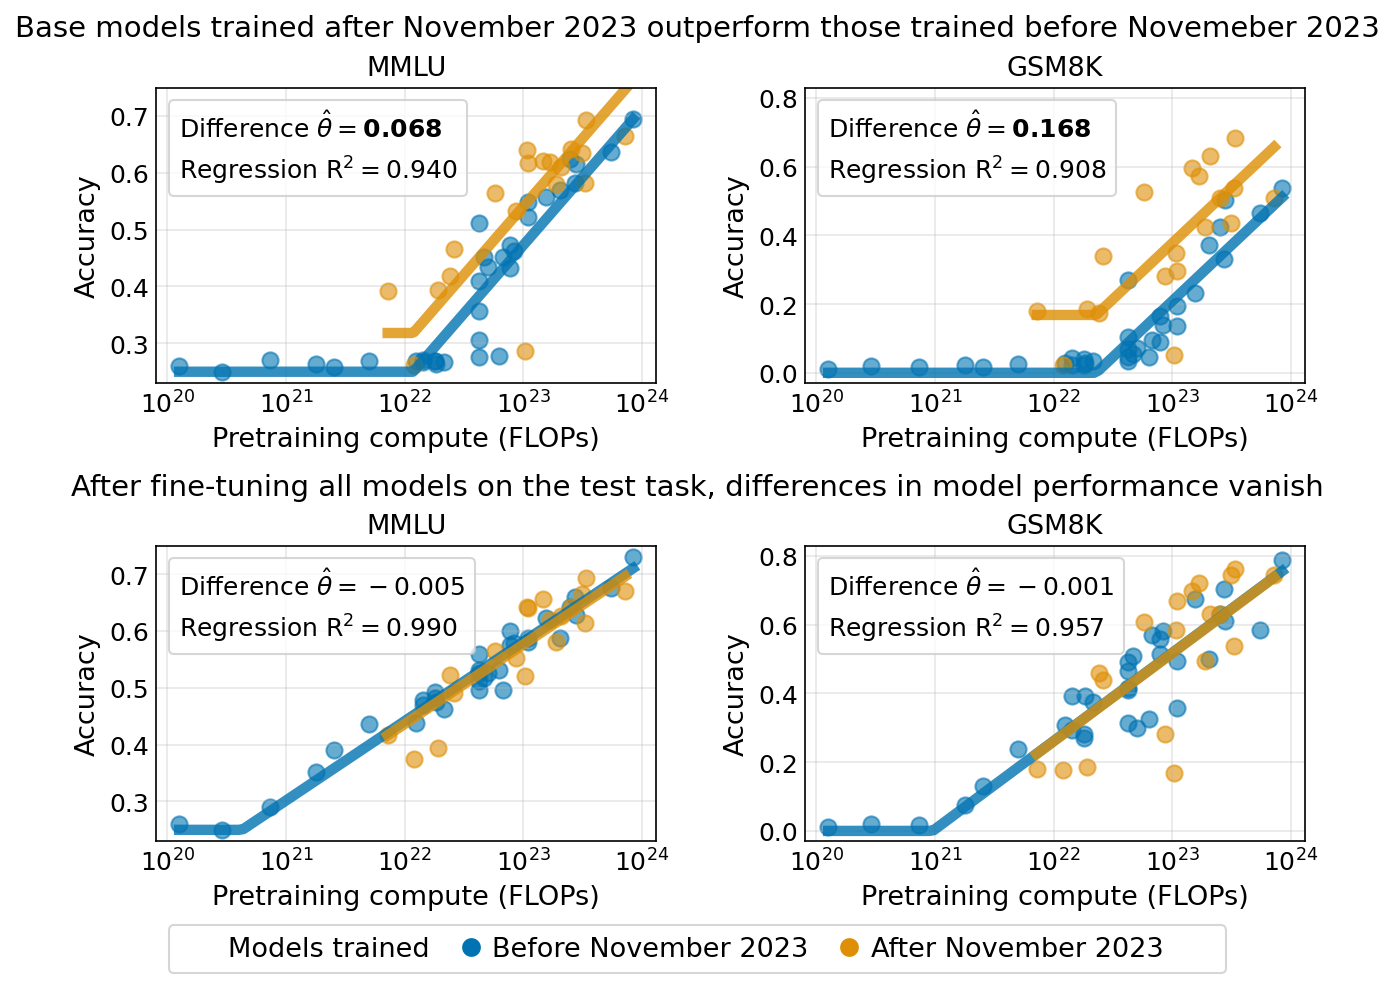

In [5]:
fig, axs = first_plot()

upper_text = 'Base models trained after November 2023 outperform those trained before Novemeber 2023'
lower_text = 'After fine-tuning all models on the test task, differences in model performance vanish'
fig.text(0.5, 1.005, upper_text, ha='center', va='center', fontsize=14)
fig.text(0.5, 0.495, lower_text, ha='center', va='center', fontsize=14)

legend1 = 'Models trained'
legend2 = 'Before November 2023'
legend3 = 'After November 2023      '
legend_elements = [
    plt.Line2D([0], [0], marker='', color='w', label=legend1, markerfacecolor='b', markersize=0),
    plt.Line2D([0], [0], marker='o', color='w', label=legend2, markerfacecolor=palette[0], markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label=legend3, markerfacecolor=palette[1], markersize=10),
]

fig.legend(handles=legend_elements, bbox_to_anchor=(0.5, -0.06),
        loc='lower center', ncol=3, fontsize=13, frameon=True, columnspacing=0.5, handletextpad=-.2,)

plt.tight_layout()
plt.subplots_adjust(wspace=0.3, hspace=0.55)
plt.savefig('plots/first.pdf', bbox_inches='tight', dpi=150)

Same plot, but with the alternative EN / CN split

/Users/rdo/Desktop/training-on-the-test-task/notebooks/plot_utils.py:62: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(c_, a_, c=color_, alpha=0.6, s=60 if main else 40, zorder=zorder_)
/Users/rdo/Desktop/training-on-the-test-task/notebooks/plot_utils.py:62: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(c_, a_, c=color_, alpha=0.6, s=60 if main else 40, zorder=zorder_)
/Users/rdo/Desktop/training-on-the

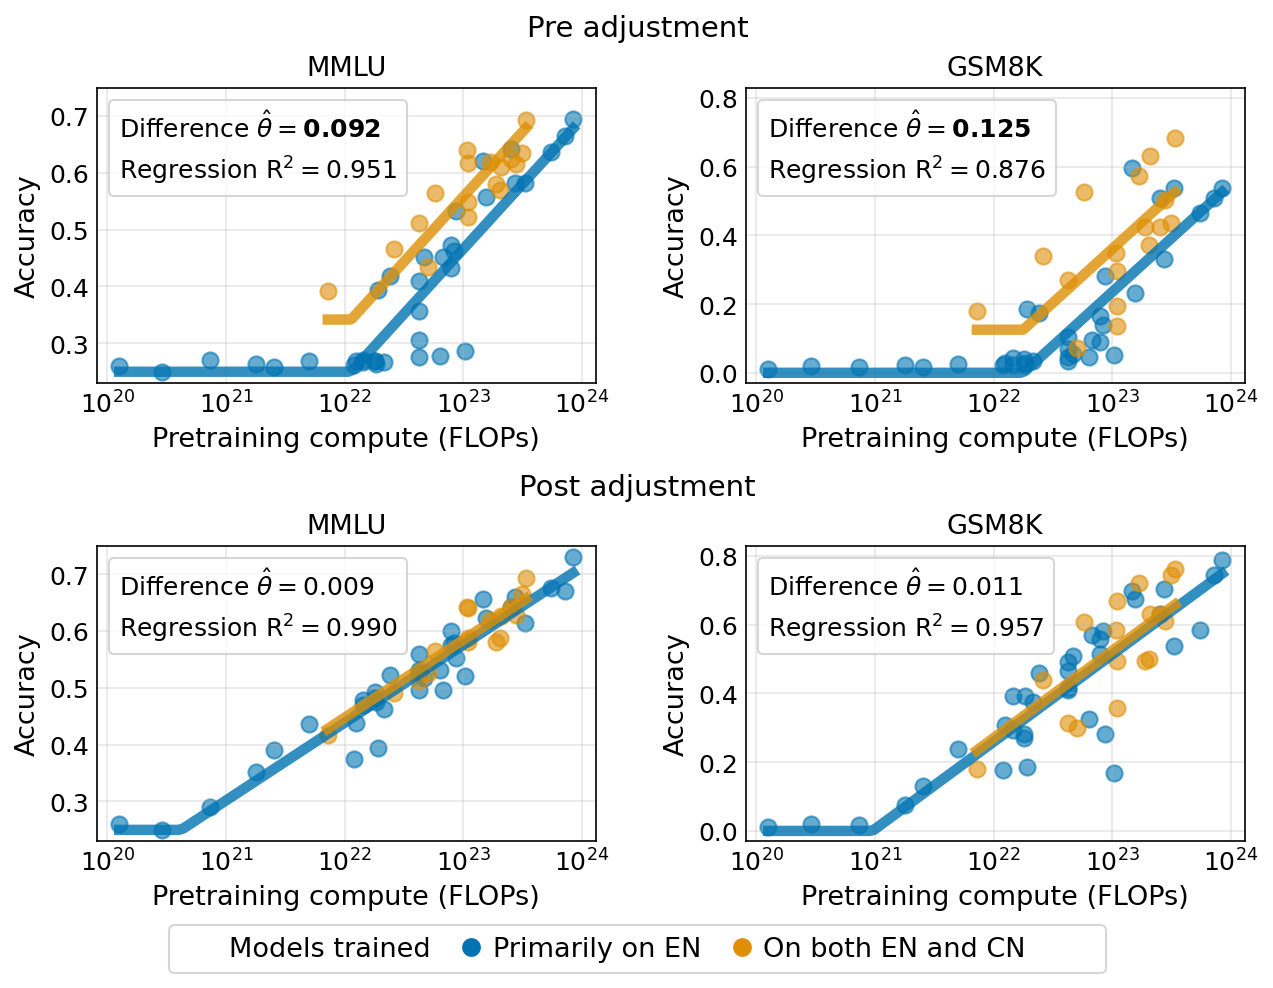

In [6]:
cn_rule = lambda c: color_rule(c, use_date=False)
fig, axs = first_plot(cn_rule)

upper_text = 'Pre adjustment'
lower_text = 'Post adjustment'
fig.text(0.5, 1.005, upper_text, ha='center', va='center', fontsize=14)
fig.text(0.5, 0.495, lower_text, ha='center', va='center', fontsize=14)


legend_elements = [
    plt.Line2D([0], [0], marker='', color='w', label='Models trained', markerfacecolor='b', markersize=0),
    plt.Line2D([0], [0], marker='o', color='w', label='Primarily on EN', markerfacecolor=palette[0], markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='On both EN and CN        ', markerfacecolor=palette[1], markersize=10),
]

fig.legend(handles=legend_elements, bbox_to_anchor=(0.5, -0.06),
        loc='lower center', ncol=3, fontsize=13, frameon=True, columnspacing=0.5, handletextpad=-.2,)

plt.tight_layout()
plt.subplots_adjust(wspace=0.3, hspace=0.55)
plt.savefig('plots/first-cn.pdf', bbox_inches='tight', dpi=150)

Plot the gain in accuracy after adjustment.

/Users/rdo/Desktop/training-on-the-test-task/notebooks/plot_utils.py:25: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(per1, per2, alpha=0.6, s=msize, c=c)


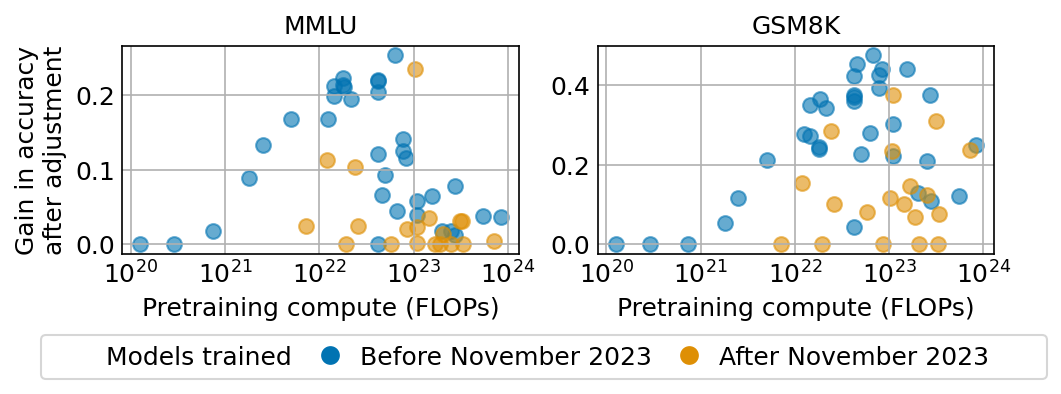

In [7]:
diff_mmlu = {m: mmlu_post[m] - mmlu_pre[m] for m in mmlu_pre}
diff_gsm8k = {m: gsm8k_post[m] - gsm8k_pre[m] for m in gsm8k_pre}

fig, ax = plt.subplots(1, 2, figsize=(7.5, 1.8), dpi=150, sharex=True)

xticks = [1e20, 1e21, 1e22, 1e23, 1e24]

msize = 50
plot_bench(ax[0], diff_mmlu, title='MMLU', xticks=xticks, msize=msize, title_fontsize=12, color_code='date')
plot_bench(ax[1], diff_gsm8k, title='GSM8K', xticks=xticks, msize=msize, title_fontsize=12, color_code='date')

ax[0].set_ylabel('Gain in accuracy\nafter adjustment', fontsize=12)
for i in range(2):
    ax[i].set_xlabel('Pretraining compute (FLOPs)', fontsize=12)
    ax[i].tick_params(axis='both', which='both', length=0, labelsize=12)

plt.subplots_adjust(wspace=0.2)

legend_elements = [
    plt.Line2D([0], [0], marker='', color='w', label=legend1, markerfacecolor='b', markersize=0),
    plt.Line2D([0], [0], marker='o', color='w', label=legend2, markerfacecolor=palette[0], markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label=legend3, markerfacecolor=palette[1], markersize=10),
]

fig.legend(handles=legend_elements, bbox_to_anchor=(0.5, -0.4),
        loc='lower center', ncol=3, fontsize=12, frameon=True, columnspacing=0.5, handletextpad=.2,)

# save as pdf on plots/
plt.savefig('plots/gain_benchmarks.pdf', bbox_inches='tight')

### Section 3: recreating the differences observed

In [8]:
# get the old models
models = [m for m in model2compute if color_rule(m) == palette[0]]
mmlu = {m: a for m, a in all_results['base']['mmlu-acc'].items() if m in models}
gsm8k = {m: a for m, a in all_results['base']['gsm8k'].items() if m in models}

In [9]:
def load_mmlu_gsm8k(base_dir):
    mmlu = load_benchmark_results(base_dir + '/mmluaux/')['mmlu-acc']
    gsm8k = load_benchmark_results(base_dir + '/gsm8kaux/')['gsm8k']
    return mmlu, gsm8k

mmlu_1e, gsm8k_1e = load_mmlu_gsm8k('evaluations/e1')
mmlu_2e, gsm8k_2e = load_mmlu_gsm8k('evaluations/e2')
mmlu_3e, gsm8k_3e = load_mmlu_gsm8k('evaluations/e3')

mmlu_1e, mmlu_3e = process_pre_post_adjustment(mmlu_1e, mmlu_3e, **process_kwargs)
gsm8k_1e, gsm8k_3e = process_pre_post_adjustment(gsm8k_1e, gsm8k_3e, **process_kwargs)

mmlu, mmlu_1e = process_pre_post_adjustment(mmlu, mmlu_1e, **process_kwargs)
mmlu, mmlu_2e = process_pre_post_adjustment(mmlu, mmlu_2e, **process_kwargs)

gsm8k, gsm8k_1e = process_pre_post_adjustment(gsm8k, gsm8k_1e, **process_kwargs)
gsm8k, gsm8k_2e = process_pre_post_adjustment(gsm8k, gsm8k_2e, **process_kwargs)

100%|██████████| 65/65 [00:00<00:00, 8990.26it/s]


In [10]:
models = set(model2compute.keys())
models &= set(mmlu.keys()) & set(gsm8k.keys())
models &= set(mmlu_1e.keys()) & set(gsm8k_1e.keys())
models &= set(mmlu_2e.keys()) & set(gsm8k_2e.keys())
models &= set(mmlu_3e.keys()) & set(gsm8k_3e.keys())
models = sorted([m for m in models if color_rule(m) == palette[0]])

# split into two groups randomly
random.seed(42)
random.shuffle(models)

too_small = [m for m in models if compute_compute(m) <= 0.9 * compute_compute('qwen-1.5-0.5b')]
others = [m for m in models if m not in too_small]
models1 = others[:len(others)//2] + too_small
models2 = others[len(others)//2:]

mmlu_ = {k: v for k, v in mmlu.items() if k in models2}
mmlu = {k: v for k, v in mmlu.items() if k in models1}
mmlu_1e = {k: v for k, v in mmlu_1e.items() if k in models2}
mmlu_2e = {k: v for k, v in mmlu_2e.items() if k in models1}
mmlu_3e = {k: v for k, v in mmlu_3e.items() if k in models2}

gsm8k_ = {k: v for k, v in gsm8k.items() if k in models2}
gsm8k = {k: v for k, v in gsm8k.items() if k in models1}
gsm8k_1e = {k: v for k, v in gsm8k_1e.items() if k in models2}
gsm8k_2e = {k: v for k, v in gsm8k_2e.items() if k in models1}
gsm8k_3e = {k: v for k, v in gsm8k_3e.items() if k in models2}

/Users/rdo/Desktop/training-on-the-test-task/notebooks/plot_utils.py:62: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(c_, a_, c=color_, alpha=0.6, s=60 if main else 40, zorder=zorder_)
/Users/rdo/Desktop/training-on-the-test-task/notebooks/plot_utils.py:62: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(c_, a_, c=color_, alpha=0.6, s=60 if main else 40, zorder=zorder_)
/Users/rdo/Desktop/training-on-the

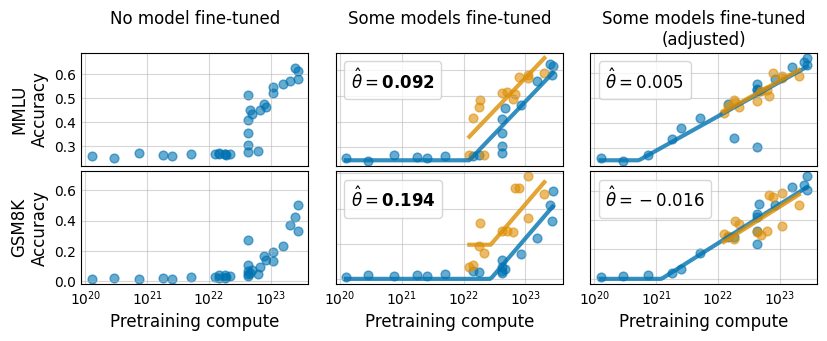

In [11]:
benchmarks = {
    'MMLU\nAccuracy': 'arc_challenge',
    'GSM8K\nAccuracy': 'hellaswag',
}

def plot_ax(ax, mmlu, mmlu_, mmlu_1e, mmlu_2e, mmlu_3e, r):
    def combine_plot(ax, r1, r2, split=True):
        c1, _, a1 = get_features(r1)
        c2, _, a2 = get_features(r2)
        if split:
            f = [0]*len(c1) + [1]*len(c2)
        else:
            f = [0] * (len(c1) + len(c2))
        plot_regressor(c1 + c2, f, a1 + a2, r, ax=ax, plot_lines=split, main=False)

    combine_plot(ax[0], mmlu, mmlu_, split=False)
    combine_plot(ax[1], mmlu, mmlu_1e)
    combine_plot(ax[2], mmlu_2e, mmlu_3e)

    # set all y to the same
    max_ = max(max(mmlu.values()), max(mmlu_.values()), max(mmlu_1e.values()), max(mmlu_2e.values()), max(mmlu_3e.values()))
    min_ = min(min(mmlu.values()), min(mmlu_.values()), min(mmlu_1e.values()), min(mmlu_2e.values()), min(mmlu_3e.values()))

    ax[0].set_ylim(min_ - 0.03, max_+0.03)
    for i in range(3):
        ax[i].grid(alpha=0.5)

fig, axs = plt.subplots(2, 3, figsize=(9.5, 3), sharex=True, sharey=False)

kwargs = {'msize': 40, 'alpha': 0.7}
thetas = [[0.001, 0.103, -0.011], [-0.011, 0.181, -0.011]]
for j, (ax, (name, benchmark)) in enumerate(zip(axs, benchmarks.items())):
    if j == 0:
        plot_ax(ax, mmlu, mmlu_, mmlu_1e, mmlu_2e, mmlu_3e, 0.25)
    else:
        plot_ax(ax, gsm8k, gsm8k_, gsm8k_1e, gsm8k_2e, gsm8k_3e, 0)

    ax[0].set_ylabel(name, fontsize=12)
    yticks = [0.3, 0.4, 0.5, 0.6] if j == 0 else [0., 0.2, 0.4, 0.6]
    for i in range(3):
        ax[i].set_yticks(yticks)

    # no ticks on y axis for the second row
    for i in range(1, 3):
        ax[i].set_yticklabels([])

for i in range(2):
    for j in range(3):
        ax = axs[i, j]
        ax.tick_params(axis='both', which='both', length=0, labelsize=10)

axs[0, 0].set_title('No model fine-tuned\n', fontsize=12)
axs[0, 1].set_title('Some models fine-tuned\n', fontsize=12)
axs[0, 2].set_title('Some models fine-tuned\n(adjusted)', fontsize=12)

for i in range(3):
    axs[-1, i].set_xlabel('Pretraining compute', fontsize=12)

xticks = [1e20, 1e21, 1e22, 1e23]
axs[0, 0].set_xticks(xticks)

plt.subplots_adjust(wspace=0.12, hspace=0.05)
plt.savefig('plots/ft.pdf', bbox_inches='tight')

/Users/rdo/Desktop/training-on-the-test-task/notebooks/plot_utils.py:62: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(c_, a_, c=color_, alpha=0.6, s=60 if main else 40, zorder=zorder_)
/Users/rdo/Desktop/training-on-the-test-task/notebooks/plot_utils.py:62: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(c_, a_, c=color_, alpha=0.6, s=60 if main else 40, zorder=zorder_)
/Users/rdo/Desktop/training-on-the

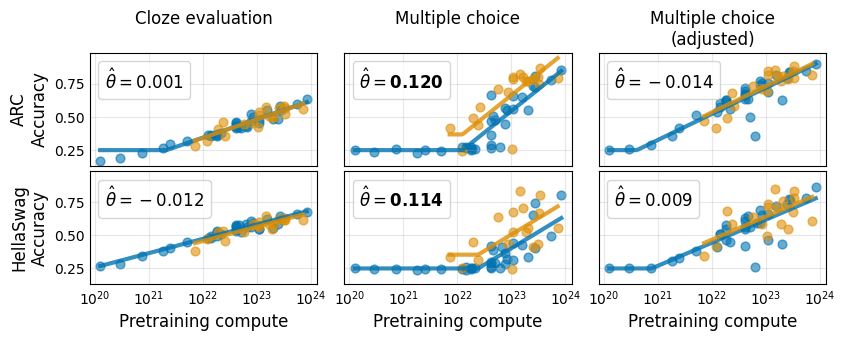

In [12]:
benchmarks = {
    'ARC\nAccuracy': 'arc_challenge',
    'HellaSwag\nAccuracy': 'hellaswag',
}

fig, axs = plt.subplots(2, 3, figsize=(9.5, 3), sharex=True, sharey=True)

kwargs = {'msize': 40, 'alpha': 0.7}
thetas = [[0.001, 0.120, -0.014], [-0.012, 0.114, 0.009]]
for j, (ax, (name, benchmark)) in enumerate(zip(axs, benchmarks.items())):
    not_mc = all_results['base'][benchmark + '-acc']
    mc = all_results['base'][benchmark + '_mc-acc']
    mc_adj = all_results['mmluaux'][benchmark + '_mc-acc']
    mc, mc_adj = process_pre_post_adjustment(mc, mc_adj, **process_kwargs)

    plot_regressor(*get_features(not_mc), 0.25, ax=ax[0], main=False)
    plot_regressor(*get_features(mc), 0.25, ax=ax[1], main=False)
    plot_regressor(*get_features(mc_adj), 0.25, ax=ax[2], main=False)

    ax[0].set_ylabel(name, fontsize=12)

    # add legend
    for i, theta in enumerate(thetas[j]):
        to_add = format(theta, ".3f")
        if i == 1:
            to_add = '\\mathbf{' + to_add + '}'
        label = "\\hat{\\theta} = " + to_add
        label = '$' + label + '$'
        legend_elements = [
            plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor='black', markersize=0),
        ]
        ax[i].legend(handles=legend_elements, loc='upper left', fontsize=12, handletextpad=-2)

for i in range(2):
    for j in range(3):
        ax = axs[i, j]
        ax.tick_params(axis='both', which='both', length=0, labelsize=10)

axs[0, 0].set_title('Cloze evaluation\n', fontsize=12)
axs[0, 1].set_title('Multiple choice\n', fontsize=12)
axs[0, 2].set_title('Multiple choice\n(adjusted)', fontsize=12)

for i in range(3):
    axs[-1, i].set_xlabel('Pretraining compute', fontsize=12)

xticks = [1e20, 1e21, 1e22, 1e23, 1e24]
axs[0, 0].set_xticks(xticks)

plt.subplots_adjust(wspace=0.12, hspace=0.05)
plt.savefig('plots/reformulate-adjusted.pdf', bbox_inches='tight')

/Users/rdo/Desktop/training-on-the-test-task/notebooks/plot_utils.py:62: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(c_, a_, c=color_, alpha=0.6, s=60 if main else 40, zorder=zorder_)
/Users/rdo/Desktop/training-on-the-test-task/notebooks/plot_utils.py:62: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(c_, a_, c=color_, alpha=0.6, s=60 if main else 40, zorder=zorder_)
/Users/rdo/Desktop/training-on-the

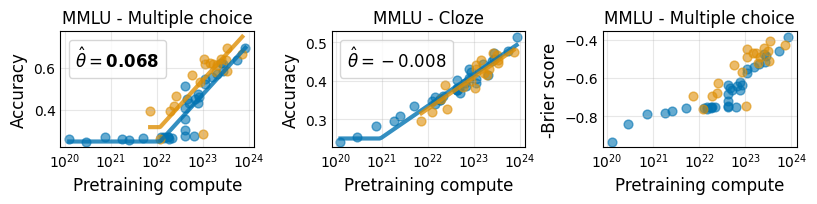

In [13]:
benchmarks = {
    'ARC': 'arc_challenge',
    'HellaSwag\nAccuracy': 'hellaswag',
}

fig, axs = plt.subplots(1, 3, figsize=(9.5, 1.5), sharex=True, sharey=False)

kwargs = {'msize': 40, 'alpha': 0.7}

# make brier negative
all_results['base']['mmlu-brier'] = {m: -abs(v) for m, v in all_results['base']['mmlu-brier'].items()}

plot_regressor(*get_features(mmlu_pre), 0.25, ax=axs[0], main=False)
plot_regressor(*get_features(all_results['base']['mmlu_cloze-acc']), 0.25, ax=axs[1], main=False)
plot_regressor(*get_features(all_results['base']['mmlu-brier']), -0.75, ax=axs[2], plot_lines=False, main=False)

axs[0].set_ylabel('Accuracy', fontsize=12)
axs[2].set_ylabel('-Brier score', fontsize=12)
axs[1].set_ylabel('Accuracy', fontsize=12)

# for i in range(2):
for j in range(3):
    ax = axs[j]
    ax.tick_params(axis='both', which='both', length=0, labelsize=10)

axs[0].set_title('MMLU - Multiple choice', fontsize=12)
axs[2].set_title('MMLU - Multiple choice', fontsize=12)
axs[1].set_title('MMLU - Cloze', fontsize=12)

for i in range(3):
    axs[i].set_xlabel('Pretraining compute', fontsize=12)

xticks = [1e20, 1e21, 1e22, 1e23, 1e24]
axs[0].set_xticks(xticks)

plt.subplots_adjust(wspace=0.4, hspace=0.05)
plt.savefig('plots/mmlu-emergence.pdf', bbox_inches='tight')

/Users/rdo/Desktop/training-on-the-test-task/notebooks/plot_utils.py:62: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(c_, a_, c=color_, alpha=0.6, s=60 if main else 40, zorder=zorder_)


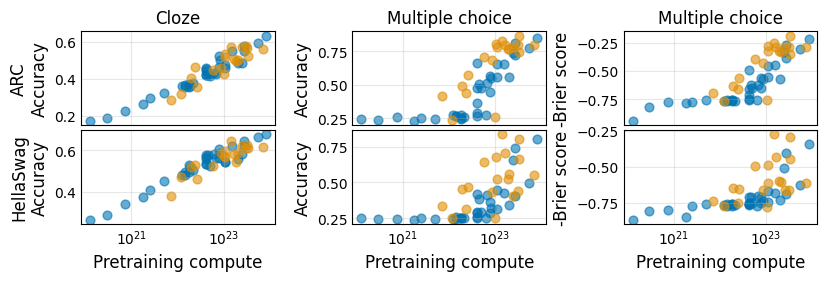

In [14]:
benchmarks = {
    'ARC\nAccuracy': 'arc_challenge',
    'HellaSwag\nAccuracy': 'hellaswag',
}

fig, axs = plt.subplots(2, 3, figsize=(9.5, 2.5), sharex=True, sharey=False)

results_diff = {}
kwargs = {'msize': 40, 'alpha': 0.7}
thetas = [[0.001, 0.120, -0.014], [-0.012, 0.114, 0.009]]
for j, (ax, (name, benchmark)) in enumerate(zip(axs, benchmarks.items())):
    plot_regressor(*get_features(all_results['base'][benchmark + '-acc']), 0.25, ax=ax[0], plot_lines=False, main=False)
    plot_regressor(*get_features(all_results['base'][benchmark + '_mc-acc']), 0.25, ax=ax[1], plot_lines=False, main=False)

    # change brier to negative
    neg_brier = {m: -v for m, v in all_results['base'][benchmark + '_mc-brier'].items()}
    plot_regressor(*get_features(neg_brier), 0.25, ax=ax[2], plot_lines=False, main=False)

    ax[0].set_ylabel(name, fontsize=12)
    ax[1].set_ylabel('Accuracy', fontsize=12)
    ax[2].set_ylabel('-Brier score', fontsize=12)


for i in range(2):
    for j in range(3):
        ax = axs[i, j]
        ax.tick_params(axis='both', which='both', length=0, labelsize=10)

axs[0, 0].set_title('Cloze', fontsize=12)
axs[0, 1].set_title('Multiple choice', fontsize=12)
axs[0, 2].set_title('Multiple choice', fontsize=12)

for i in range(3):
    axs[-1, i].set_xlabel('Pretraining compute', fontsize=12)

xticks = [1e20, 1e21, 1e22, 1e23, 1e24]
axs[0, 0].set_xticks(xticks)
ax.set_xscale('log')

plt.subplots_adjust(wspace=0.4, hspace=0.05)
plt.savefig('plots/brier-arc.pdf', bbox_inches='tight')

### Section 4

Compute the gain in pareto area

/var/folders/6b/g5148_j17tzcrm8qq__90y_w0000gn/T/ipykernel_13967/793037684.py:144: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


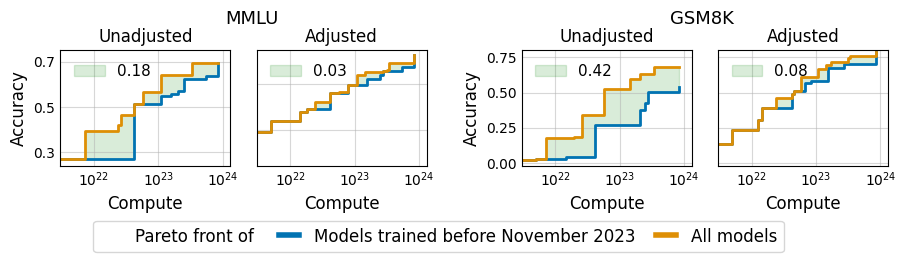

In [15]:
def pareto_frontier(results):
    """ constructs the pareto frontier of performance against compute """
    # sort models by compute
    compute = {m: compute_compute(m) for m in results}
    models = sorted(results, key=lambda m: compute[m])

    pareto_result = [results[models[0]]]
    pareto_compute = [compute[models[0]]]
    for m in models[1:]:
        if results[m] > pareto_result[-1]:
            pareto_result.append(results[m])
            pareto_compute.append(compute[m])
    
    pareto_compute.append(compute[models[-1]])
    pareto_result.append(pareto_result[-1])
    return pareto_compute, pareto_result

def get_pareto_plot_points(pareto):
    c, a = pareto
    for i in range(len(c) - 1):
        yield c[i], a[i]
        yield c[i+1], a[i]
    yield c[-1], a[-1]

def get_new_pareto(pareto, new_c):
    pareto_c, pareto_a = pareto
    i = 0
    for c in new_c:
        while i + 1 < len(pareto_c) and pareto_c[i+1] <= c:
            i += 1
        yield c, pareto_a[i]

def integrate(pareto1, pareto2):
    c1, a1 = pareto1
    c2, a2 = pareto2

    assert c1 == c2
    c = np.log10(c1)
    da = (np.array(a2) - np.array(a1))[:-1]
    total = np.sum(da * np.diff(c))
    return total


def plot_pareto(results, ax=None, ylabel=None, xlabel=None, title=None):
    if ax is None:
        _, ax = plt.subplots(1, 1, figsize=(4.5, 2), dpi=150)

    results_old = {m: v for m, v in results.items() if color_rule(m) == palette[0]}

    pareto_pre = pareto_frontier(results_old)
    pareto_post = pareto_frontier(results)

    union_compute = sorted(list(set(pareto_pre[0]) | set(pareto_post[0])))
    pareto_pre = list(zip(*get_new_pareto(pareto_pre, union_compute)))
    pareto_post = list(zip(*get_new_pareto(pareto_post, union_compute)))

    plot_pareto_pre = list(zip(*get_pareto_plot_points(pareto_pre)))
    plot_pareto_post = list(zip(*get_pareto_plot_points(pareto_post)))

    ax.plot(*plot_pareto_pre, color=palette[0], alpha=1., linewidth=2)
    ax.plot(*plot_pareto_post, color=palette[1], alpha=1., linewidth=2)

    # shade the area between the two curves
    area = integrate(pareto_pre, pareto_post)
    ax.fill_between(plot_pareto_pre[0], plot_pareto_pre[1], plot_pareto_post[1], color='g', alpha=0.15, label=f'{area:.2f}')

    ax.set_xscale('log')

    if ylabel is not None:
        ax.set_ylabel(ylabel, fontsize=12)
    if xlabel is not None:
        ax.set_xlabel(xlabel, fontsize=12)
    if title is not None:
        ax.set_title(title, fontsize=12)

    # legend below the plot
    ax.legend(fontsize=11, frameon=False, loc='upper left')#, bbox_to_anchor=(0.07, -0.31))

    ax.xaxis.set_tick_params(which='both', length=0)
    ax.yaxis.set_tick_params(which='both', length=0)

    ax.grid(alpha=0.5)

    return area

fig = plt.figure(figsize=(8.5, 1.5))

gs = fig.add_gridspec(1, 4, wspace=0.5)
axs = [fig.add_subplot(gs[0, i]) for i in range(4)]
pos = [ax.get_position() for ax in axs]

width = 0.2
dplot = 0.09
dw = 0.12
axs[0].set_position([pos[0].x0, pos[0].y0, width, pos[0].height])
axs[1].set_position([pos[0].x0 + pos[0].width + dplot, pos[1].y0, width, pos[1].height])
axs[2].set_position([pos[2].x0 + dw, pos[2].y0, width, pos[3].height])
axs[3].set_position([pos[2].x0 + dw + pos[2].width + dplot, pos[3].y0, width, pos[3].height])

plot_pareto(mmlu_pre, ax=axs[0])
plot_pareto(mmlu_post, ax=axs[1])

plot_pareto(gsm8k_pre, ax=axs[2])
plot_pareto(gsm8k_post, ax=axs[3])

axs[0].set_yticks([0.3, 0.5, 0.7])

for ax in axs:
    ax.set_xlim(3e21, None)

axs[1].set_yticklabels([])
axs[3].set_yticklabels([])

mmlu_ylim = (0.24, 0.75)
gsm8k_ylim = (-0.02, 0.8)
axs[0].set_ylim(*mmlu_ylim)
axs[1].set_ylim(*mmlu_ylim)
axs[2].set_ylim(*gsm8k_ylim)
axs[3].set_ylim(*gsm8k_ylim)

axs[0].set_ylabel('Accuracy', fontsize=12)
axs[2].set_ylabel('Accuracy', fontsize=12)
axs[0].set_xlabel('Compute', fontsize=12)
axs[1].set_xlabel('Compute', fontsize=12)
axs[2].set_xlabel('Compute', fontsize=12)
axs[3].set_xlabel('Compute', fontsize=12)
axs[0].set_title('Unadjusted', fontsize=12)
axs[1].set_title('Adjusted', fontsize=12)
axs[2].set_title('Unadjusted', fontsize=12)
axs[3].set_title('Adjusted', fontsize=12)

fig.text(0.35, 1.09, 'MMLU', ha='center', va='center', fontsize=13)
fig.text(0.88, 1.09, 'GSM8K', ha='center', va='center', fontsize=13)

legend_elements = [
    plt.Line2D([0], [0], color='w', label='Pareto front of ', markerfacecolor='b', markersize=0),
    plt.Line2D([0], [0], color=palette[0], label='Models trained before November 2023', linewidth=4),
    plt.Line2D([0], [0], color=palette[1], label='All models', linewidth=4),
]

fig.legend(handles=legend_elements, bbox_to_anchor=(0.57,  -0.52),
        loc='lower center', ncol=3, fontsize=12, frameon=True, columnspacing=1.2, handletextpad=.9, handlelength=1.2)

plt.tight_layout()
plt.savefig('plots/pareto_mmlu.pdf', bbox_inches='tight')

Compare Pythia, Llama 2 and Qwen

/var/folders/6b/g5148_j17tzcrm8qq__90y_w0000gn/T/ipykernel_13967/38096034.py:23: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter([compute_compute(m) for m in qwen], [qwen[m] for m in qwen],c=palette[1], label='Qwen', **kwargs)
/var/folders/6b/g5148_j17tzcrm8qq__90y_w0000gn/T/ipykernel_13967/38096034.py:25: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter([compute_compute(m) for m in pythia], [pythia[m] for m

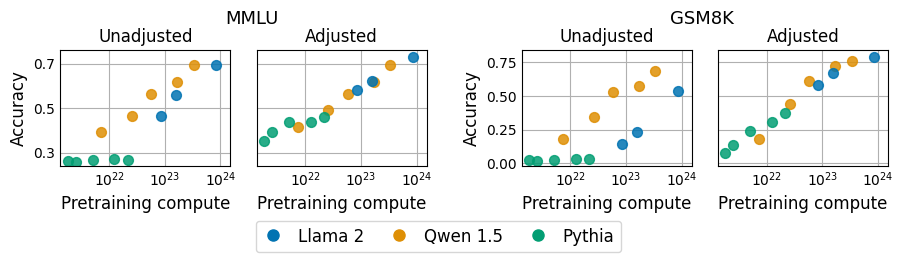

In [16]:
fig = plt.figure(figsize=(8.5, 1.5))

gs = fig.add_gridspec(1, 4, wspace=0.5)
axs = [fig.add_subplot(gs[0, i]) for i in range(4)]
pos = [ax.get_position() for ax in axs]

width = 0.2
dplot = 0.09
dw = 0.12
axs[0].set_position([pos[0].x0, pos[0].y0, width, pos[0].height])
axs[1].set_position([pos[0].x0 + pos[0].width + dplot, pos[1].y0, width, pos[1].height])
axs[2].set_position([pos[2].x0 + dw, pos[2].y0, width, pos[3].height])
axs[3].set_position([pos[2].x0 + dw + pos[2].width + dplot, pos[3].y0, width, pos[3].height])

def plot_llama_qwen(result, ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=150)
    qwen = {m: result[m] for m in result if 'qwen' in m}
    llama = {m: result[m] for m in result if 'llama-2' in m and 'open' not in m and 'llama-3' not in m}
    pythia = {m: result[m] for m in result if 'pythia' in m and 'b' in m}

    kwargs = {'alpha': 0.85, 's': 50, 'zorder': 1}
    ax.scatter([compute_compute(m) for m in qwen], [qwen[m] for m in qwen],c=palette[1], label='Qwen', **kwargs)
    ax.scatter([compute_compute(m) for m in llama], [llama[m] for m in llama], label='Llama 2', c=[palette[0]], **kwargs)
    ax.scatter([compute_compute(m) for m in pythia], [pythia[m] for m in pythia], c=palette[2], label='Pythia', **kwargs)

    ax.set_xscale('log')
    ax.grid(zorder=-10)
    ax.set_axisbelow(True)

    ax.xaxis.set_tick_params(which='both', length=0)
    ax.yaxis.set_tick_params(which='both', length=0)

# plot stuff here
plot_llama_qwen(mmlu_pre, ax=axs[0])
plot_llama_qwen(mmlu_post, ax=axs[1])
plot_llama_qwen(gsm8k_pre, ax=axs[2])
plot_llama_qwen(gsm8k_post, ax=axs[3])


axs[0].set_yticks([0.3, 0.5, 0.7])
axs[1].set_yticks([0.3, 0.5, 0.7])

axs[1].set_yticklabels([])
axs[3].set_yticklabels([])

mmlu_ylim = (0.24, 0.76)
gsm8k_ylim = (-0.02, 0.84)
axs[0].set_ylim(*mmlu_ylim)
axs[1].set_ylim(*mmlu_ylim)
axs[2].set_ylim(*gsm8k_ylim)
axs[3].set_ylim(*gsm8k_ylim)

axs[0].set_ylabel('Accuracy', fontsize=12)
axs[2].set_ylabel('Accuracy', fontsize=12)
for i in range(4):
    axs[i].set_xlabel('Pretraining compute', fontsize=12)
axs[0].set_title('Unadjusted', fontsize=12)
axs[1].set_title('Adjusted', fontsize=12)
axs[2].set_title('Unadjusted', fontsize=12)
axs[3].set_title('Adjusted', fontsize=12)

# xlim up to 1e24
for ax in axs:
    ax.set_xlim(None, 1.5e24)

fig.text(0.35, 1.09, 'MMLU', ha='center', va='center', fontsize=13)
fig.text(0.88, 1.09, 'GSM8K', ha='center', va='center', fontsize=13)

legend_elements = [
    matplotlib.lines.Line2D([0], [0], color=palette[0], label='Llama 2', markersize=8, marker='o', markerfacecolor=palette[0], ls=''),
    matplotlib.lines.Line2D([0], [0], color=palette[1], label='Qwen 1.5', markersize=8, marker='o', markerfacecolor=palette[1], ls=''),
    matplotlib.lines.Line2D([0], [0], color=palette[2], label='Pythia', markersize=8, marker='o', markerfacecolor=palette[2], ls='')
]

legend_position = (0.57,  -0.52)
ncol = 3
fig.legend(handles=legend_elements, bbox_to_anchor=legend_position,
        loc='lower center', ncol=ncol, fontsize=12, frameon=True, columnspacing=1.5, handletextpad=.9, handleheight=0.8, handlelength=1.2)

plt.savefig('plots/families.pdf', bbox_inches='tight')

### Section 5: emergence

In [17]:
results_mmlu = load_steps('evaluations/intermediate/mmluaux/evals/', 'mmlu')
results_mmlu = {s: {m: results_mmlu[s][m]['acc'] for m in results_mmlu[s]} for s in results_mmlu}  # use acc
results_gsm8k = load_steps('evaluations/intermediate/gsm8kaux/evals/', 'gsm8k')

100%|██████████| 53/53 [00:00<00:00, 729.00it/s]


/Users/rdo/miniconda3/envs/hug/lib/python3.10/site-packages/pwlf/pwlf.py:1579: LinAlgWarning: Ill-conditioned matrix (rcond=7.40575e-20): result may not be accurate.
  beta_prime = linalg.solve(K, z)
/Users/rdo/miniconda3/envs/hug/lib/python3.10/site-packages/pwlf/pwlf.py:1579: LinAlgWarning: Ill-conditioned matrix (rcond=8.54786e-20): result may not be accurate.
  beta_prime = linalg.solve(K, z)


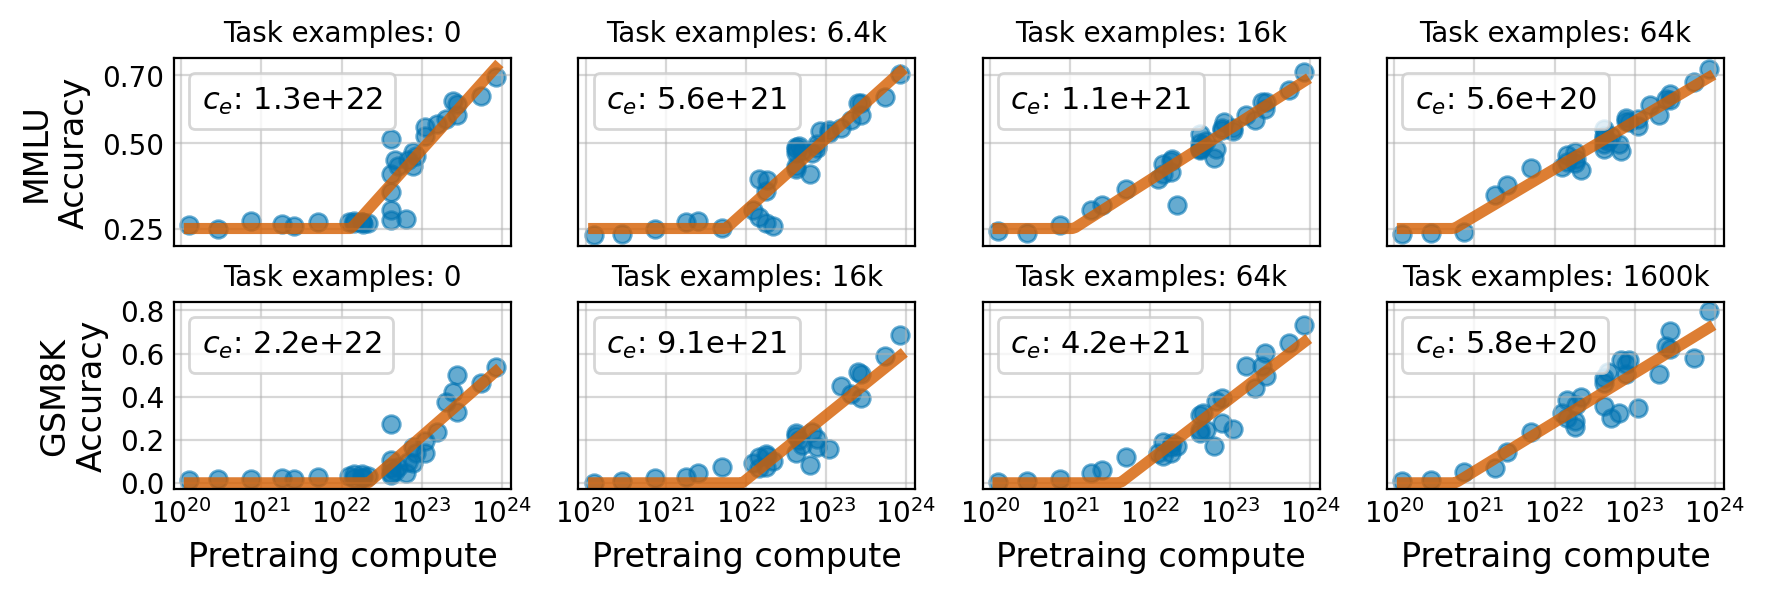

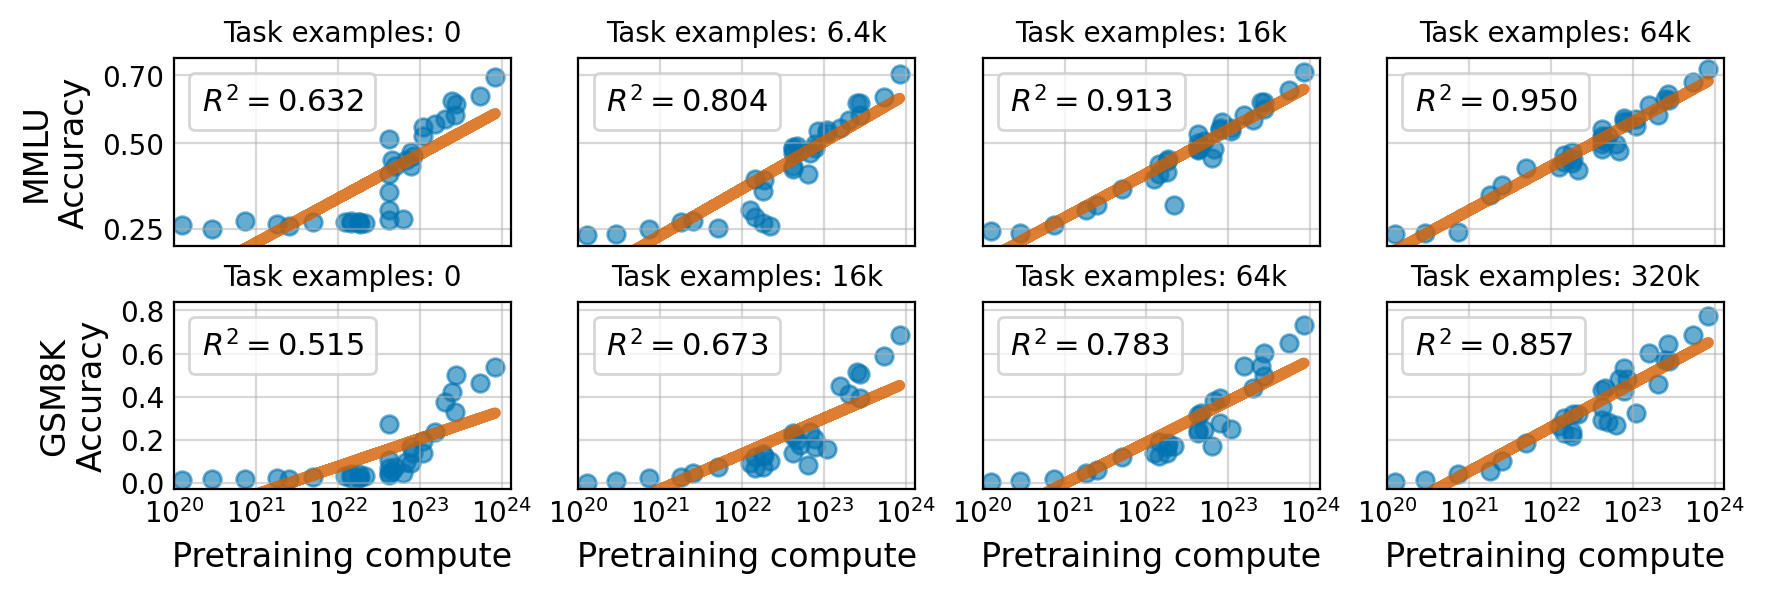

In [18]:
_, axs = plt.subplots(2, 4, figsize=(10,2.8), dpi=200, sharex=True, sharey=False)
emergence_plots(results_mmlu, all_results['base']['mmlu-acc'], [0, 100, 250, 1000], 0.25, axs=axs[0], ylabel='MMLU\nAccuracy', emergence=True, titles=True, x=False)
emergence_plots(results_gsm8k, all_results['base']['gsm8k'], [0, 250, 1000, 25000], 0.0, axs=axs[1], ylabel='GSM8K\nAccuracy', emergence=True, titles=True, x=True)
plt.savefig('plots/emergence.pdf', bbox_inches='tight')

_, axs = plt.subplots(2, 4, figsize=(10,2.8), dpi=200, sharex=True, sharey=False)
emergence_plots(results_mmlu, all_results['base']['mmlu-acc'], [0, 100, 250, 1000], 0.25, axs=axs[0], ylabel='MMLU\nAccuracy', emergence=False, titles=True, x=False)
emergence_plots(results_gsm8k, all_results['base']['gsm8k'], [0, 250, 1000, 5000], 0.0, axs=axs[1], ylabel='GSM8K\nAccuracy', emergence=False, titles=True, x=True)
plt.savefig('plots/r2.pdf', bbox_inches='tight')

### Appendix

Are newer models similar to older, fine-tuned models?

In [19]:
def split_old_new(results):
    results_old = {m: a for m, a in results.items() if color_rule(m) == palette[0]}
    results_new = {m: a for m, a in results.items() if color_rule(m) == palette[1]}
    return results_old, results_new

mmlu_old, mmlu_new = split_old_new(all_results['base']['mmlu-acc'])
gsm8k_old, gsm8k_new = split_old_new(all_results['base']['gsm8k'])
mmlu_old_ft, _ = split_old_new(results_mmlu[1000])
gsm8k_old_ft, _ = split_old_new( results_gsm8k[1000])

/Users/rdo/Desktop/training-on-the-test-task/notebooks/plot_utils.py:25: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(per1, per2, alpha=0.6, s=msize, c=c)


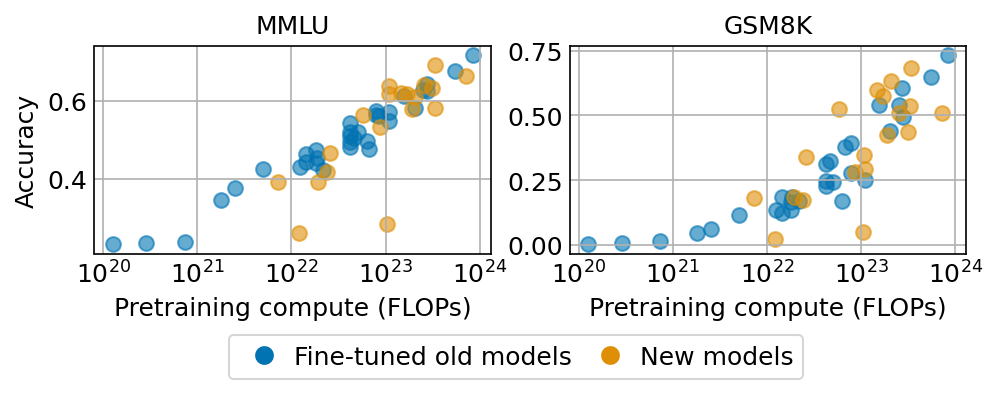

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(7.5, 1.8), dpi=150, sharex=True)
kwargs = {'xticks': [1e20, 1e21, 1e22, 1e23, 1e24], 'title_fontsize': 12, 'msize': 50, 'color_code': 'date'}
plot_bench(ax[0], {**mmlu_old_ft, **mmlu_new}, title='MMLU', **kwargs)
plot_bench(ax[1], {**gsm8k_old_ft, **gsm8k_new}, title='GSM8K', **kwargs)

ax[0].set_ylabel('Accuracy', fontsize=12)
for i in range(2):
    ax[i].set_xlabel('Pretraining compute (FLOPs)', fontsize=12)
    ax[i].tick_params(axis='both', which='both', length=0, labelsize=12)

plt.subplots_adjust(wspace=0.2)

legend_elements = [
    # plt.Line2D([0], [0], marker='', color='w', label=legend1, markerfacecolor='b', markersize=0),
    plt.Line2D([0], [0], marker='o', color='w', label='Fine-tuned old models', markerfacecolor=palette[0], markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='New models', markerfacecolor=palette[1], markersize=10),
]

fig.legend(handles=legend_elements, bbox_to_anchor=(0.5, -0.4),
        loc='lower center', ncol=3, fontsize=12, frameon=True, columnspacing=0.5, handletextpad=.2,)

# save as pdf on plots/
plt.savefig('plots/ft_old.pdf', bbox_inches='tight')

In [21]:
from xgboost import XGBClassifier
from sklearn.metrics import balanced_accuracy_score

def get_accuracy(set_0, set_1):
    X = np.r_[set_0, set_1]
    y = np.r_[np.zeros(len(set_0)), np.ones(len(set_1))]

    y_tests = []
    y_preds = []
    for i in range(len(X)):  # leave-one-out
        X_train = np.delete(X, i, axis=0)
        y_train = np.delete(y, i)
        X_test = X[i].reshape(1, -1)
        y_test = y[i]
        clf = XGBClassifier()
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        y_tests.append(y_test)
        y_preds.append(y_pred)

    acc = balanced_accuracy_score(y_tests, y_preds)
    return acc

def featurize(results):
    compute = np.array([compute_compute(m) for m in results])
    return np.c_[np.log10(compute), list(results.values())]

mmlu_datasets = {
    'old': featurize(mmlu_old),
    'new': featurize(mmlu_new),
    'old_ft': featurize(mmlu_old_ft),
}

gsm8k_datasets = {
    'old': featurize(gsm8k_old),
    'new': featurize(gsm8k_new),
    'old_ft': featurize(gsm8k_old_ft),
}

print('Discriminator test -- using both compute and accuracy')
discriminator = {
    'mmlu': {
        'old': get_accuracy(mmlu_datasets['new'], mmlu_datasets['old']),
        'old_ft': get_accuracy(mmlu_datasets['new'], mmlu_datasets['old_ft']),
    },
    'gsm8k': {
        'old': get_accuracy(gsm8k_datasets['new'], gsm8k_datasets['old']),
        'old_ft': get_accuracy(gsm8k_datasets['new'], gsm8k_datasets['old_ft']),
    },
}

def wrap_multirrow(text, n=2):
    return f'\\multirow{{{n}}}{{*}}{{{text:.1f}\%}}'

table = f"Older models vs & {wrap_multirrow(discriminator['mmlu']['old'] * 100)} & {wrap_multirrow(discriminator['gsm8k']['old'] * 100)} \\\\\n"
table += f"newer models & & \\\\[0.4em]\n"
table += f"Fine-tuned, older models vs & {wrap_multirrow(discriminator['mmlu']['old_ft'] * 100)} & {wrap_multirrow(discriminator['gsm8k']['old_ft'] * 100)} \\\\\n"
table += f"newer models & & \\\\"
print(table)

Discriminator test -- using both compute and accuracy
Older models vs & \multirow{2}{*}{64.6\%} & \multirow{2}{*}{73.9\%} \\
newer models & & \\[0.4em]
Fine-tuned, older models vs & \multirow{2}{*}{52.2\%} & \multirow{2}{*}{52.5\%} \\
newer models & & \\



Saturation

/Users/rdo/Desktop/training-on-the-test-task/notebooks/plot_utils.py:25: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(per1, per2, alpha=0.6, s=msize, c=c)


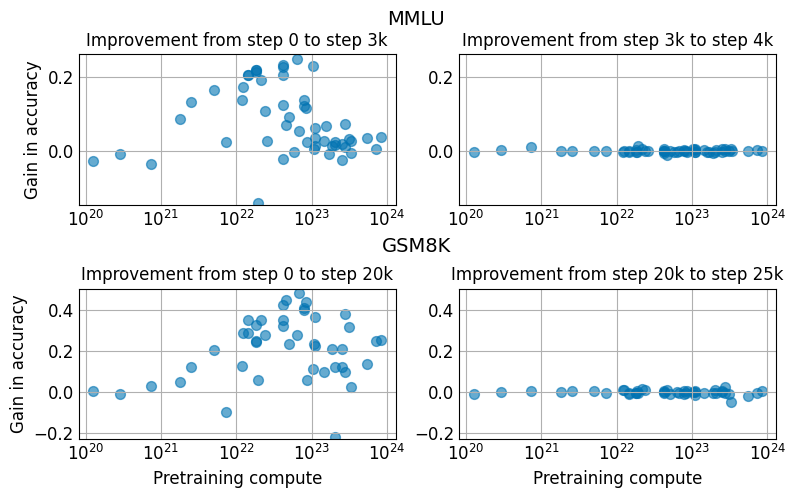

In [22]:
mmlu_diff1 = {s: results_mmlu[3000][s] - all_results['base']['mmlu-acc'][s] for s in results_mmlu[3000]}
gsm8k_diff1 = {s: results_gsm8k[20000][s] - all_results['base']['gsm8k'][s] for s in results_gsm8k[20000]}

mmlu_diff2 = {s: results_mmlu[4000][s] - results_mmlu[3000][s] for s in results_mmlu[4000]}
gsm8k_diff2 = {s: results_gsm8k[25000][s] - results_gsm8k[20000][s] for s in results_gsm8k[25000]}

fig, ax = plt.subplots(2, 2, figsize=(9, 5))
kwargs = {'msize': 50, 'c_rule': lambda m: palette[0]}

plot_bench(ax[0, 0], mmlu_diff1, **kwargs)
plot_bench(ax[0, 1], mmlu_diff2, **kwargs)

# set min and max
min_ = min(min(mmlu_diff1.values()), min(mmlu_diff2.values()))
max_ = max(max(mmlu_diff1.values()), max(mmlu_diff2.values()))
for i in range(2):
    ax[0, i].set_ylim(min_ * 1.05, max_ * 1.05)
    ax[0, i].tick_params(axis='both', which='both', length=0, labelsize=12)

plot_bench(ax[1, 0], gsm8k_diff1, **kwargs)
plot_bench(ax[1, 1], gsm8k_diff2, **kwargs)

# set min and max
min_ = min(min(gsm8k_diff1.values()), min(gsm8k_diff2.values()))
max_ = max(max(gsm8k_diff1.values()), max(gsm8k_diff2.values()))
for i in range(2):
    ax[1, i].set_ylim(min_ * 1.05, max_ * 1.05)
    ax[1, i].tick_params(axis='both', which='both', length=0, labelsize=12)
    ax[i, 0].set_ylabel('Gain in accuracy', fontsize=12)
    ax[1, i].set_xlabel('Pretraining compute', fontsize=12)

fig.text(0.5, 0.95, 'MMLU', ha='center', va='center', fontsize=14)
fig.text(0.5, 0.495, 'GSM8K', ha='center', va='center', fontsize=14)

ax[0, 0].set_title('Improvement from step 0 to step 3k', fontsize=12)
ax[0, 1].set_title('Improvement from step 3k to step 4k', fontsize=12)

ax[1, 0].set_title('Improvement from step 0 to step 20k', fontsize=12)
ax[1, 1].set_title('Improvement from step 20k to step 25k', fontsize=12)

# add wspace
plt.subplots_adjust(hspace=0.55)
plt.savefig('plots/saturation.pdf', bbox_inches='tight')


In [23]:
base = 'evaluations/new_evals/'
bases = {
    'base': f'{base}base/',
    'mmluaux': f'{base}mmluaux/',
    'gsm8kaux': f'{base}gsm8kaux/',
}

new_results = {name: load_benchmark_results(dir_) for name, dir_ in bases.items()}

to_extract = [
    'leaderboard_mmlu_pro',
    'leaderboard_mmlu_pro_four',
    'leaderboard_musr',
    'leaderboard_bbh',
    'leaderboard_gpqa',
]

processed = {}
for b in to_extract:
    pre, post = process_pre_post_adjustment(
        new_results['base'][b],
        new_results['mmluaux'][b],
        **process_kwargs
    )
    processed[b] = {'pre': pre, 'post': post}

pre, post = process_pre_post_adjustment(
    new_results['base']['leaderboard_math_hard'],
    new_results['gsm8kaux']['leaderboard_math_hard'],
    **process_kwargs
)
processed['leaderboard_math_hard'] = {'pre': pre, 'post': post}

100%|██████████| 53/53 [00:00<00:00, 1033.52it/s]


/Users/rdo/Desktop/training-on-the-test-task/notebooks/plot_utils.py:62: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(c_, a_, c=color_, alpha=0.6, s=60 if main else 40, zorder=zorder_)
/Users/rdo/Desktop/training-on-the-test-task/notebooks/plot_utils.py:62: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(c_, a_, c=color_, alpha=0.6, s=60 if main else 40, zorder=zorder_)
/Users/rdo/Desktop/training-on-the

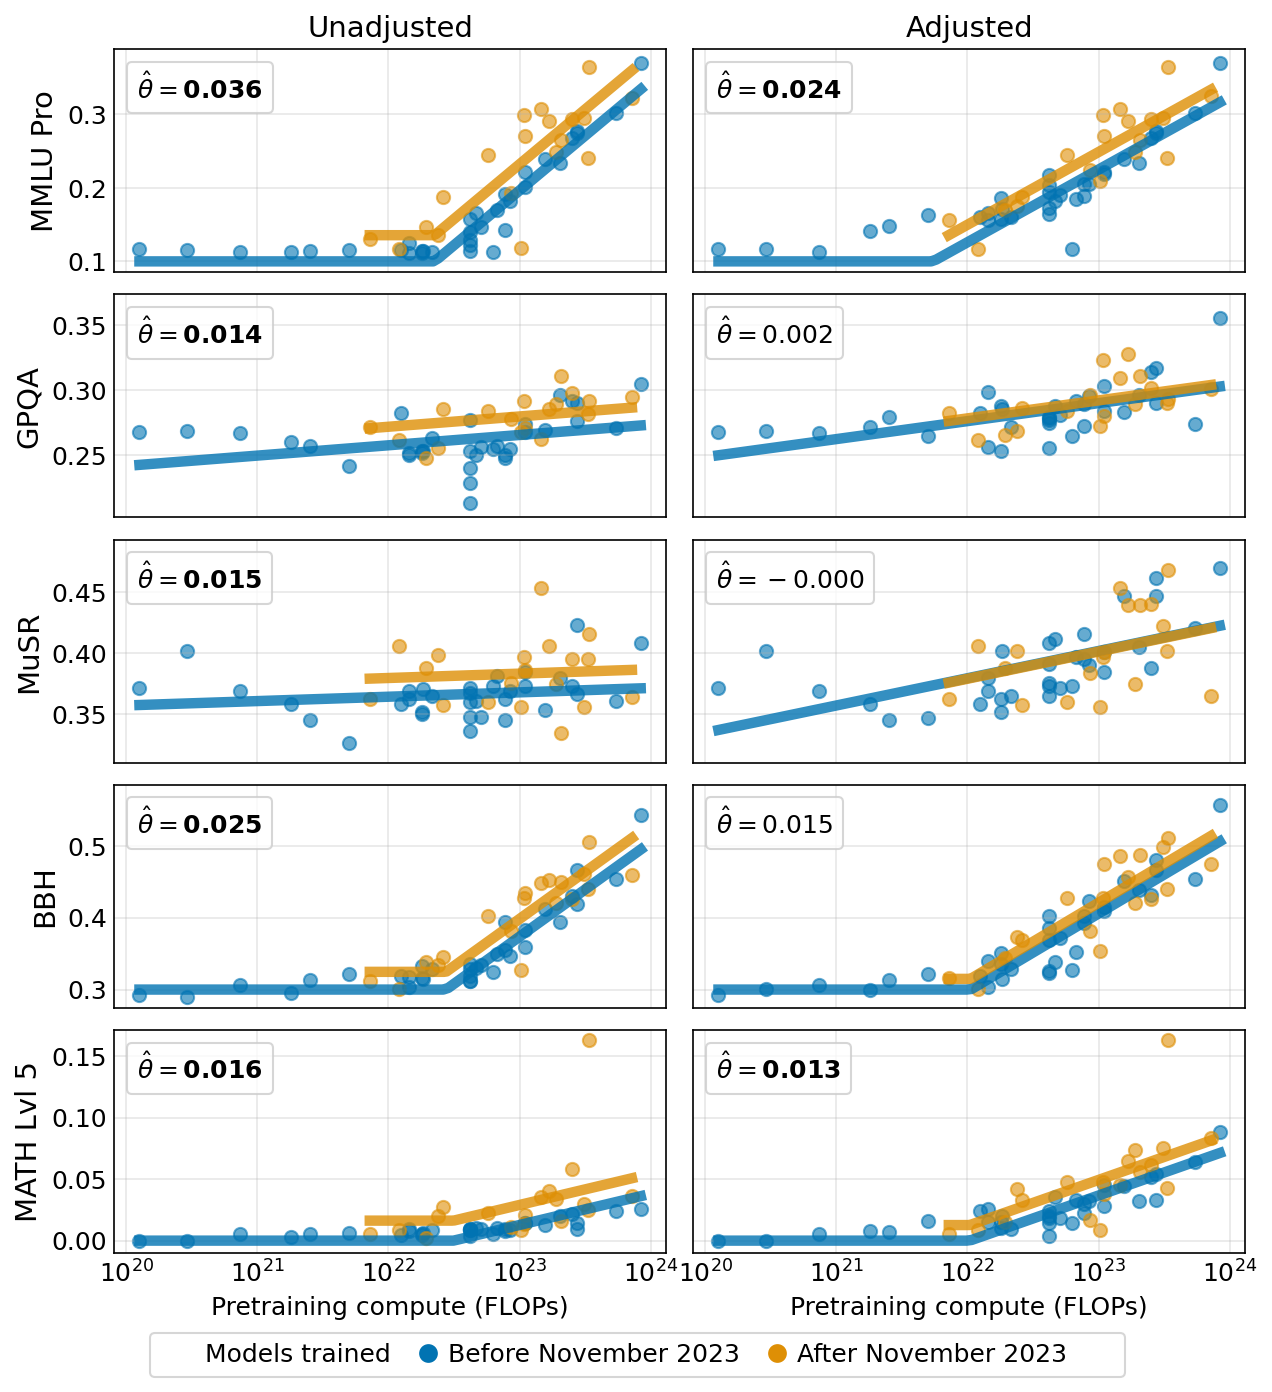

In [24]:
rs = {
    'leaderboard_mmlu_pro': 0.1,
    'leaderboard_gpqa': 0.0,
    'leaderboard_musr': 0.0,
    'leaderboard_bbh': 0.3,
    'leaderboard_math_hard': 0.0,
}

labels = {
    'leaderboard_mmlu_pro': 'MMLU Pro',
    'leaderboard_gpqa': 'GPQA',
    'leaderboard_musr': 'MuSR',
    'leaderboard_bbh': 'BBH',
    'leaderboard_math_hard': 'MATH Lvl 5',
    'leaderboard_mmlu_pro_four': 'MMLU Pro\n(4 choices)',
}

def make_plot(axs, benchmark, r):
    pre = processed[benchmark]['pre']
    post = processed[benchmark]['post']

    plot_regressor(*get_features(pre), r, ax=axs[0], main=False, linewidth=5)
    plot_regressor(*get_features(post), r, ax=axs[1], main=False, linewidth=5)

    axs[1].set_yticklabels([])

    min_ = min(min(pre.values()), min(post.values()))
    max_ = max(max(pre.values()), max(post.values()))
    min_ *= 0.95
    if min_ < 0.1:
        min_ -= 0.01
    if i == 0:
        min_ -= 0.02
    for j in range(2):
        axs[j].set_ylim(min_, max_ * 1.05)

    axs[0].set_ylabel(labels[benchmark], fontsize=14)
    for j in range(2):
        axs[j].tick_params(axis='both', which='both', length=0, labelsize=12)

fig, all_axs = plt.subplots(5, 2, figsize=(8.6, 9), dpi=150, sharex=True)

for i, (benchmark, r) in enumerate(rs.items()):
    make_plot(all_axs[i], benchmark, r)

legend_elements = [
    plt.Line2D([0], [0], marker='', color='w', label=legend1, markerfacecolor='b', markersize=0),
    plt.Line2D([0], [0], marker='o', color='w', label=legend2, markerfacecolor=palette[0], markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label=legend3, markerfacecolor=palette[1], markersize=10),
]

fig.legend(handles=legend_elements, bbox_to_anchor=(0.5, -0.035),
        loc='lower center', ncol=3, fontsize=12, frameon=True, columnspacing=0.5, handletextpad=-.2,)

for i in range(2):
    all_axs[-1, i].set_xlabel('Pretraining compute (FLOPs)', fontsize=12)

all_axs[0, 0].set_title('Unadjusted', fontsize=14)
all_axs[0, 1].set_title('Adjusted', fontsize=14)

plt.tight_layout()
plt.subplots_adjust(wspace=0.05, hspace=0.1)
plt.savefig('plots/hf-v2.pdf', bbox_inches='tight')

/Users/rdo/Desktop/training-on-the-test-task/notebooks/plot_utils.py:62: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(c_, a_, c=color_, alpha=0.6, s=60 if main else 40, zorder=zorder_)
/Users/rdo/Desktop/training-on-the-test-task/notebooks/plot_utils.py:62: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(c_, a_, c=color_, alpha=0.6, s=60 if main else 40, zorder=zorder_)


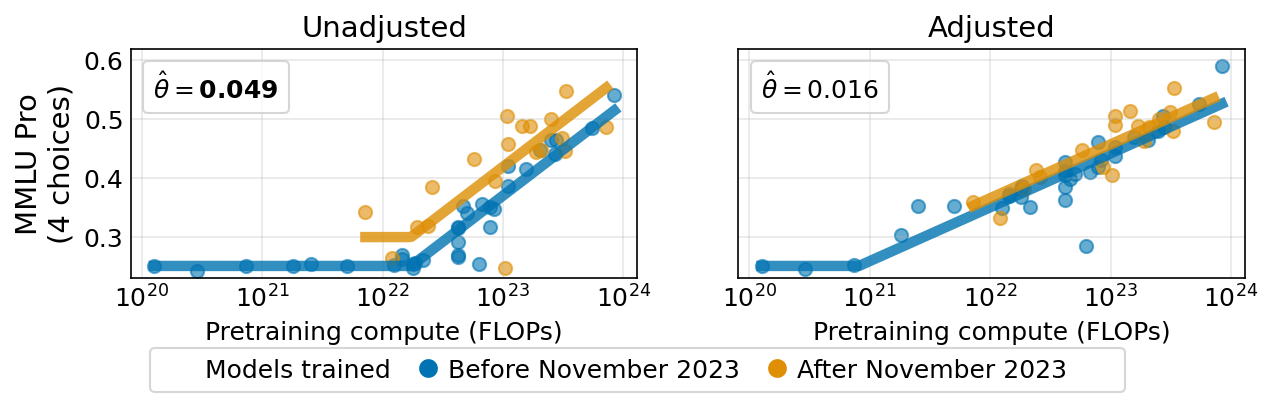

In [25]:
fig, all_axs = plt.subplots(1, 2, figsize=(8.6, 2.5), dpi=150, sharex=True)

make_plot(all_axs, 'leaderboard_mmlu_pro_four', 0.25)

legend_elements = [
    plt.Line2D([0], [0], marker='', color='w', label=legend1, markerfacecolor='b', markersize=0),
    plt.Line2D([0], [0], marker='o', color='w', label=legend2, markerfacecolor=palette[0], markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label=legend3, markerfacecolor=palette[1], markersize=10),
]

fig.legend(handles=legend_elements, bbox_to_anchor=(0.5, -0.1),
        loc='lower center', ncol=3, fontsize=12, frameon=True, columnspacing=0.5, handletextpad=-.2,)

for i in range(2):
    all_axs[i].set_xlabel('Pretraining compute (FLOPs)', fontsize=12)

all_axs[0].set_title('Unadjusted', fontsize=14)
all_axs[1].set_title('Adjusted', fontsize=14)

plt.tight_layout()
plt.subplots_adjust(wspace=0.2)
plt.savefig('plots/hf-v2-mmlupro-4.pdf', bbox_inches='tight')

Tables for the causal interpretation

In [26]:
results_post = {
    'MMLU': regress_seg(*get_features(mmlu_post)),
    'GSM8K': regress_seg(*get_features(gsm8k_post)),
}

diff_mmlu = {m: mmlu_pre[m] - mmlu_post[m] for m in mmlu_pre}
diff_gsm8k = {m: gsm8k_pre[m] - gsm8k_post[m] for m in gsm8k_pre}

results_diff = {
    'MMLU': regress_seg(*get_features(diff_mmlu)),
    'GSM8K': regress_seg(*get_features(diff_gsm8k)),
}

In [27]:

def add_bold(str, p):
    if p < 0.05:
        return '\\textbf{'+str+'}'
    return str
    
def format_number(num, n=2):
    # three decimal places
    num = float(num)
    if num < 1e-3 and num > 0:
        num = abs(num)
    return '{0:.3f}'.format(num)
    
table = ''
table += '\\begin{tabular}{c c c}\n'
table += '\\toprule\n'
table += '\\phantom{**} & \\phantom{*}MMLU\\phantom{*} & \\phantom{*}GSM8K\\phantom{*}' + ' \\\\\n'
table += '\\hline\\\\[-0.9em]\n'

def add_multirow(v):
    return '\\multirow{2}{*}{'+v+'}'

# add i = 1 of results_post
row = [f'{format_number(results_post[k]["coeffs"][1], 3)}' for k in ['MMLU', 'GSM8K']]
row = [add_bold(r, results_post[k]["ps"][1]) for r, k in zip(row, ['MMLU', 'GSM8K'])]
table += add_multirow('$\\hat{\\psi}$') + ' & ' + ' & '.join(row) + ' \\\\\n'
# add standard errors
row = [f'({format_number(results_post[k]["stderrs"][1], 2)})' for k in ['MMLU', 'GSM8K']]
table += '& ' + ' & '.join(row) + ' \\\\[0.3em]\n'

# add r2 of results_post
row = [format_number(results_post[k]["r2"]) for k in ['MMLU', 'GSM8K']]
row = [r for r in row]
table += 'R$^2$ &' + ' & '.join(row) + ' \\\\\\n'
table += '\\bottomrule\\\\[-0.8em]\n'
table += '\\end{tabular}'
print(table)

\begin{tabular}{c c c}
\toprule
\phantom{**} & \phantom{*}MMLU\phantom{*} & \phantom{*}GSM8K\phantom{*} \\
\hline\\[-0.9em]
\multirow{2}{*}{$\hat{\psi}$} & -0.004 & 0.000 \\
& (0.009) & (0.032) \\[0.3em]
R$^2$ &0.926 & 0.763 \\\n\bottomrule\\[-0.8em]
\end{tabular}


In [28]:
table = ''
table += '\\begin{tabular}{c c c}\n'
table += '\\toprule\n'
# first is dataset names

table += '\\phantom{**} & \\phantom{*}MMLU\\phantom{*} & \\phantom{*}GSM8K\\phantom{*}' + ' \\\\\n'
table += '\\hline\\\\[-0.9em]\n'

def add_multirow(v):
    return '\\multirow{2}{*}{'+v+'}'

# # add i = 1 of results_diff
row = [f'{format_number(results_diff[k]["coeffs"][1], 3)}' for k in ['MMLU', 'GSM8K']]
row = [add_bold(r, results_diff[k]["ps"][1]) for r, k in zip(row, ['MMLU', 'GSM8K'])]
table += add_multirow('$\\hat{\\phi}$') + ' & ' + ' & '.join(row) + ' \\\\\n'
# add standard errors
row = [f'({format_number(results_diff[k]["stderrs"][1], 2)})' for k in ['MMLU', 'GSM8K']]
table += '&' + ' & '.join(row) + ' \\\\[0.3em]\n'
# add r2 of results_diff
row = [format_number(results_diff[k]["r2"]) for k in ['MMLU', 'GSM8K']]
row = [r for r in row]
table += 'R$^2$ & ' + ' & '.join(row) + ' \\\\\n'

table += '\\bottomrule\\\\[-0.8em]\n'
table += '\\end{tabular}'
print(table)

\begin{tabular}{c c c}
\toprule
\phantom{**} & \phantom{*}MMLU\phantom{*} & \phantom{*}GSM8K\phantom{*} \\
\hline\\[-0.9em]
\multirow{2}{*}{$\hat{\phi}$} & \textbf{0.071} & \textbf{0.168} \\
&(0.018) & (0.032) \\[0.3em]
R$^2$ & 0.530 & 0.503 \\
\bottomrule\\[-0.8em]
\end{tabular}
